#### Imports & Config

In [89]:
from milligrad import Tensor
from milligrad.nn import MLP

import pandas as pd
import matplotlib.pyplot as plt

#### Data

In [90]:
raw_data = pd.read_csv("data.csv").sample(1000)

X = raw_data[["lag_1", "lag_2", "lag_3", "lag_4"]].to_numpy()
y = raw_data[["target"]].to_numpy()

SX = Tensor((X - X.mean(axis=0)) / X.std(axis=0))
Sy = (y - y.mean()) / y.std()
n = float(len(Sy))

In [91]:
model = MLP(4, [16, 16, 1])

In [92]:
def loss():
    predictions = model(SX)
    diff = Sy - predictions
    return (diff * diff).sum() * (1.0 / n)

In [93]:
for i in range(10_000):
    loss_i = loss()
    model.zero_grad()
    loss_i.backward()

    learning_rate = 0.1
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if i % 1000 == 0:
        print(f"step {i} loss {loss_i.data}")

step 0 loss 2.5899388799278986
step 1000 loss 0.23198054113905825
step 2000 loss 0.1865617088383246
step 3000 loss 0.17285981114489715
step 4000 loss 0.16147370842450245
step 5000 loss 0.15729753148402068
step 6000 loss 0.15401703841131872
step 7000 loss 0.15265029929740337
step 8000 loss 0.14787927956711336
step 9000 loss 0.15033097694006892


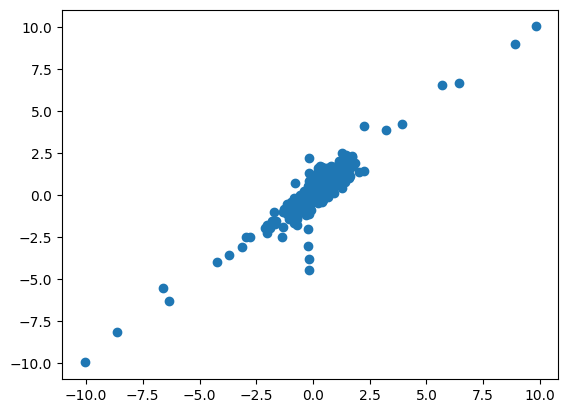

In [94]:
plt.scatter(model(SX).data, Sy)